In [1]:
#Load Libraries:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier
import category_encoders as ce
from xgboost.sklearn import XGBRegressor
from sklearn import preprocessing
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn import utils
# import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import warnings

warnings.filterwarnings("ignore")
from multiprocessing import Pool
import sys
import time

In [2]:
dropped_columns = set()
targetVariable = 'fraudulent'

df = pd.read_csv('fake_job_postings.csv')

# df = df.drop('NAME', axis=1)
# number of rows;
rows = df.shape[0];
print("Number of rows=", df.shape[0])
print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

# number of columns;
columns = df.shape[1];
print("Number of original columns= ", columns)

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")

# axis=1 means column
# df = df.drop(targetVariable, axis=1)
cv = df.dtypes.loc[df.dtypes == 'object'].index
categorical = list(df.select_dtypes(include=['object']).columns.values)
print(cv)

print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
print(categorical)

Number of rows= 17880
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Number of original columns=  18
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']


<AxesSubplot:>

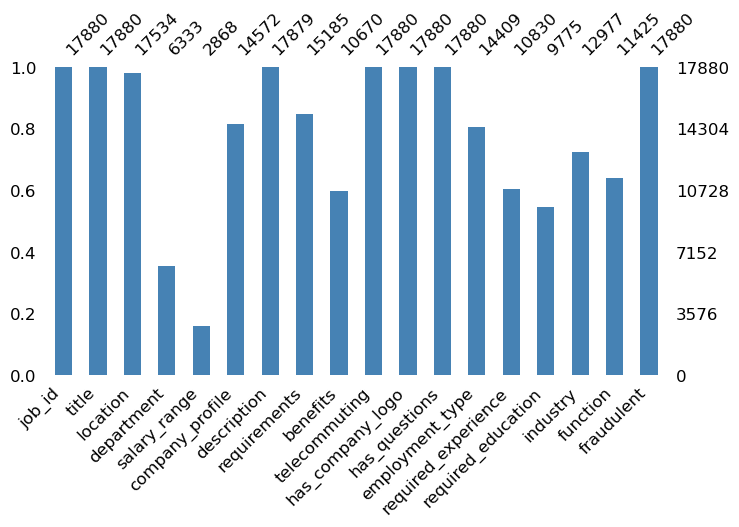

In [3]:
#Plot showing missing values in each column

import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df, figsize=(8, 4), fontsize=12, color='steelblue')

In [4]:
try:
    # To calculate mean use imputer class
    
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
    #new = imputer.fit_transform(train.Age.values.reshape(1,-1))

    # Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature by columns (axis=0)
    mean_imputer = imputer(missing_values='NaN', strategy='mean', axis=0)

    # Train the imputor on the df dataset
    mean_imputer = mean_imputer.fit(df)
    

    # Apply the imputer to the df dataset
    imputed_df = mean_imputer.transform(df.values)
    
    # View the data
    imputed_df

    # imputer = imputer.fit(df[:, 1:columns])
    # df[:, 1:columns] = imputer.transform(df[:, 1:columns])
    
except Exception as e:
    print("FillNAs")
    print(str(e))

FillNAs
'SimpleImputer' object is not callable


In [5]:

simp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_imputed= pd.DataFrame(simp.fit_transform(df))
df_imputed.head(5)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,Marketing Intern,"US, NY, New York",Marketing,0-0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,See job description,0,1,0,Other,Internship,Bachelor's Degree,Information Technology and Services,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0-0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Sales,0-0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,See job description,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0-0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Sales,0-0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
try:
    print(df.shape)
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print(df.info())
    # On classification problems you need to know how balanced the class values are.( This is an example)
    # positive is the class or target name
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print(df.groupby(targetVariable).size())
    # We can analyze all the data set
    
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print(df.describe())
except Exception as e:
    print("Preprocess errors 2")
    print(str(e))


(17880, 18)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
try:
    for cat in categorical:
        print(cat)
        # df[cat].fillna(targetVariable, inplace=True)
        # df[cat] = le.fit_transform(df[cat])
        df[cat] = le.fit_transform(df[cat].astype(str))
    # for i in cv:
    #  df[i]=le.fit_transform(df[i])
    # test[i]=le.fit_transform(test[i])
except Exception as e:
    print("errorEncoder")
    print(str(e))

title
location
department
salary_range
company_profile
description
requirements
benefits
employment_type
required_experience
required_education
industry
function


In [8]:
def drop_constant_columns(df):
    result = df.copy()
    for column in df.columns:
        if len(df[column].unique()) == 1:
            result = result.drop(column, axis=1)
    return result
    
drop_constant_columns(df)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,6043,2535,758,874,1526,4506,3829,6001,0,1,0,2,4,13,131,22,0
1,2,2183,1073,1161,874,50,7255,10526,5570,0,1,0,1,6,13,75,7,0
2,3,1763,1867,1321,874,1389,7470,4560,6001,0,1,0,5,7,13,131,37,0
3,4,299,1703,1054,874,975,9590,3166,3334,0,1,0,1,5,1,22,31,0
4,5,975,1741,1321,874,1210,5724,6495,2254,0,1,1,1,5,1,51,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,268,166,1054,874,1391,6152,9679,5457,0,1,1,1,5,13,22,31,0
17876,17877,7101,2734,62,874,1546,10355,152,2548,0,1,1,1,5,1,61,0,0
17877,17878,7579,2875,1321,874,1430,4258,1789,6001,0,0,0,1,7,13,131,37,0
17878,17879,4107,1045,1321,874,1674,7024,443,1707,0,0,1,0,6,6,48,9,0


In [9]:
try:
    print("variance1")
    # column variance of the dataframe
    print(df.var(axis=0))
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print("variance2")
    # row variance of the dataframe
    print(df.var(axis=1))
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    # drop columns with no variance
    # df = df.loc[:, df.var() == 0.0]
    df = drop_constant_columns(df)
    threshold = 0.2
    df.drop(df.std()[df.std() < threshold].index.values, axis=1)
    columns = df.shape[1];
    print("Number of columns after dropping low variance", columns)
    print("- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
except Exception as e:
    print("drop low variance")
    print(str(e))

variance1
job_id                 2.664269e+07
title                  1.050438e+07
location               8.242765e+05
department             1.340149e+05
salary_range           3.280852e+04
company_profile        2.829053e+05
description            1.784153e+07
requirements           1.400154e+07
benefits               3.816043e+06
telecommuting          4.105923e-02
has_company_logo       1.628058e-01
has_questions          2.499455e-01
employment_type        2.808919e+00
required_experience    6.474760e+00
required_education     2.882873e+01
industry               1.862943e+03
function               1.544431e+02
fraudulent             4.609073e-02
dtype: float64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
variance2
0        4.666866e+06
1        9.201365e+06
2        5.158619e+06
3        5.546090e+06
4        3.778813e+06
             ...     
17875    2.247599e+07
17876    2.294924e+07
17877    1.992584e+07
17878    1.8988

In [10]:
missing_data = df.isnull()
# check infinite value
print("check infinite value, you should get false then true")

check infinite value, you should get false then true


In [11]:
print("now all false")
print(np.isnan(df.any()))  # you should get False

now all false
job_id                 False
title                  False
location               False
department             False
salary_range           False
company_profile        False
description            False
requirements           False
benefits               False
telecommuting          False
has_company_logo       False
has_questions          False
employment_type        False
required_experience    False
required_education     False
industry               False
function               False
fraudulent             False
dtype: bool


In [12]:
print("now all true")
print(np.isfinite(df.all()))  # You should get  True
print("end check infinite values")

now all true
job_id                 True
title                  True
location               True
department             True
salary_range           True
company_profile        True
description            True
requirements           True
benefits               True
telecommuting          True
has_company_logo       True
has_questions          True
employment_type        True
required_experience    True
required_education     True
industry               True
function               True
fraudulent             True
dtype: bool
end check infinite values


In [13]:
print(missing_data.head(5))

   job_id  title  location  department  salary_range  company_profile  \
0   False  False     False       False         False            False   
1   False  False     False       False         False            False   
2   False  False     False       False         False            False   
3   False  False     False       False         False            False   
4   False  False     False       False         False            False   

   description  requirements  benefits  telecommuting  has_company_logo  \
0        False         False     False          False             False   
1        False         False     False          False             False   
2        False         False     False          False             False   
3        False         False     False          False             False   
4        False         False     False          False             False   

   has_questions  employment_type  required_experience  required_education  \
0          False            Fals

In [14]:
print(missing_data.sum())

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64


In [15]:
print(df.head(10))

   job_id  title  location  department  salary_range  company_profile  \
0       1   6043      2535         758           874             1526   
1       2   2183      1073        1161           874               50   
2       3   1763      1867        1321           874             1389   
3       4    299      1703        1054           874              975   
4       5    975      1741        1321           874             1210   
5       6    375      2084        1321           874             1674   
6       7   4296       216          50           296              565   
7       8   5550      1564        1321           874              125   
8       9   4201      1772        1321           874             1197   
9      10   2210      1383        1321           874              930   

   description  requirements  benefits  telecommuting  has_company_logo  \
0         4506          3829      6001              0                 1   
1         7255         10526      5570        

In [16]:
# def drop_constant_columns(df):
#     """
#     Drops constant value columns of pandas dataframe.
#     """
#     result = df.copy()
#     for column in df.columns:
#         if len(df[column].unique()) == 1:
#             result = result.drop(column, axis=1)
#     return result

# print(df.head(10))


In [17]:
def drop_constant_column1(dataframe):
    try:
        # temp=df.loc[:, "NAME"].var()
        eps = 1e-6
        C = dataframe.columns
        print('Identifing low-variance columns...', end=' ')
        for c in C:
            print(dataframe[c])
            temp = dataframe.loc[:, c]
            variance = dataframe.loc[:, c].var()
            print(variance)
            # temp =  c.var()
        if variance < eps:
            # print('.. %-30s: too low variance ... column ignored'%(c))
            dropped_columns.add(c)
            dataframe.drop(c)
            print('done!')
    except Exception as e:
        print("drop no variance")
        print(str(e))
        # result = dataframe.copy()
        # for column in dataframe.columns:
        #       if dataframe[column].var() < eps:
        #          result = result.drop(column)
    # return result
    # return dataframe.loc[:, (dataframe != dataframe.iloc[0]).any()]

    # parameter =df[targetVariable].mean() # parameter = "Nan"
    # df[targetVariable].fillna(parameter, inplace = True )
    # Dimmension of Your Data and Data Types

    # We can analyze any colums separate
    # print(df['Pregnancies'].describe())
    # When we have categorical values in the data set, we can create a table and sumarize it
    # print(df.describe(include=['O']))

In [18]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from pandas.api.types import CategoricalDtype
from collections import defaultdict
from sklearn.model_selection import train_test_split
    # apply the categorical dtype
    # define a categorical dtype
    # platforms = ['android', 'ios', 'amazon']
    # platform_category = CategoricalDtype(categories=platforms, ordered=False)
    # df['platform'] = df['platform'].astype(platform_category)

    # create a mapping from all categorical columns that can be used with OrdinalEncoder
    # categorical_columns = list(df.select_dtypes(['category']).columns)
    # category_mapping = [
    # {'col': column_name, 'mapping': list(zip(df[column_name].cat.categories, df[column_name].cat.codes))}
    # for column_name in categorical_columns
    # ]
    # clean the data set from nulls, nan, and infitinity values

In [19]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [20]:
X = df
y = pd.DataFrame(data=X, columns=[targetVariable])
try:
    clean_dataset(df)
    
except Exception as e:
    print("error_preprocess_clean_dataset")
    print(str(e))
# d = defaultdict(LabelEncoder)


In [21]:
try:

    ce_ord=ce.OrdinalEncoder(cols=['fraudulent', 'title','description'])
    #ce_ord = ce.OrdinalEncoder(cols=['job_id', 'title','description'])
    df = ce_ord.fit_transform(df)
    # df = df.apply(lambda x:ce_ord.fit_transform(X))
    outdata = ce_ord.fit_transform(X, y)
    outdata1 = outdata[['fraudulent', 'description', 'title']]
    outdata2 = outdata[['fraudulent', 'description']]
    outdata3 = outdata[['fraudulent']]
    # we use all columns except PolarityClass as
    # features for training
    label = df[targetVariable]
    label1 = df[targetVariable]
    features = df.drop(targetVariable, 1)
    # the label is PolarityClass

    print(outdata)
except Exception as e:
    print("error_preprocess0")
    print(str(e))

       job_id  title  location  department  salary_range  company_profile  \
0           1      1      2535         758           874             1526   
1           2      2      1073        1161           874               50   
2           3      3      1867        1321           874             1389   
3           4      4      1703        1054           874              975   
4           5      5      1741        1321           874             1210   
...       ...    ...       ...         ...           ...              ...   
17875   17876  11230       166        1054           874             1391   
17876   17877   5411      2734          62           874             1546   
17877   17878  11231      2875        1321           874             1430   
17878   17879    658      1045        1321           874             1674   
17879   17880   7598      1092         434           874             1391   

       description  requirements  benefits  telecommuting  has_company_logo

In [22]:
# Correlation Between Attributes
try:
    print(df.corr())
    corr_matrix = df.corr()
    # To check a correlation with our target

    print(corr_matrix[targetVariable].sort_values(ascending=False))
    #plt.figure()
    #sns.heatmap(df.corr(), vmin=-1, vmax=1.0, fontsize=8, annot=True)
    
    # plt.show()
except Exception as e:
    print("error_preprocess1")
    print(str(e))

                       job_id     title  location  department  salary_range  \
job_id               1.000000  0.613974  0.027294    0.024398     -0.005401   
title                0.613974  1.000000 -0.036148   -0.025170     -0.047201   
location             0.027294 -0.036148  1.000000    0.114440      0.050022   
department           0.024398 -0.025170  0.114440    1.000000      0.057763   
salary_range        -0.005401 -0.047201  0.050022    0.057763      1.000000   
company_profile      0.008274 -0.070281  0.074860    0.068073      0.014877   
description          0.844337  0.670102 -0.024192   -0.029970     -0.042584   
requirements         0.024947 -0.042568  0.024344    0.100171      0.059955   
benefits             0.014502 -0.009292  0.057709    0.117195      0.105241   
telecommuting       -0.004559 -0.006564  0.020411   -0.005401     -0.068475   
has_company_logo    -0.014539  0.020413 -0.095680   -0.104706      0.049814   
has_questions       -0.087025 -0.031080 -0.101593   

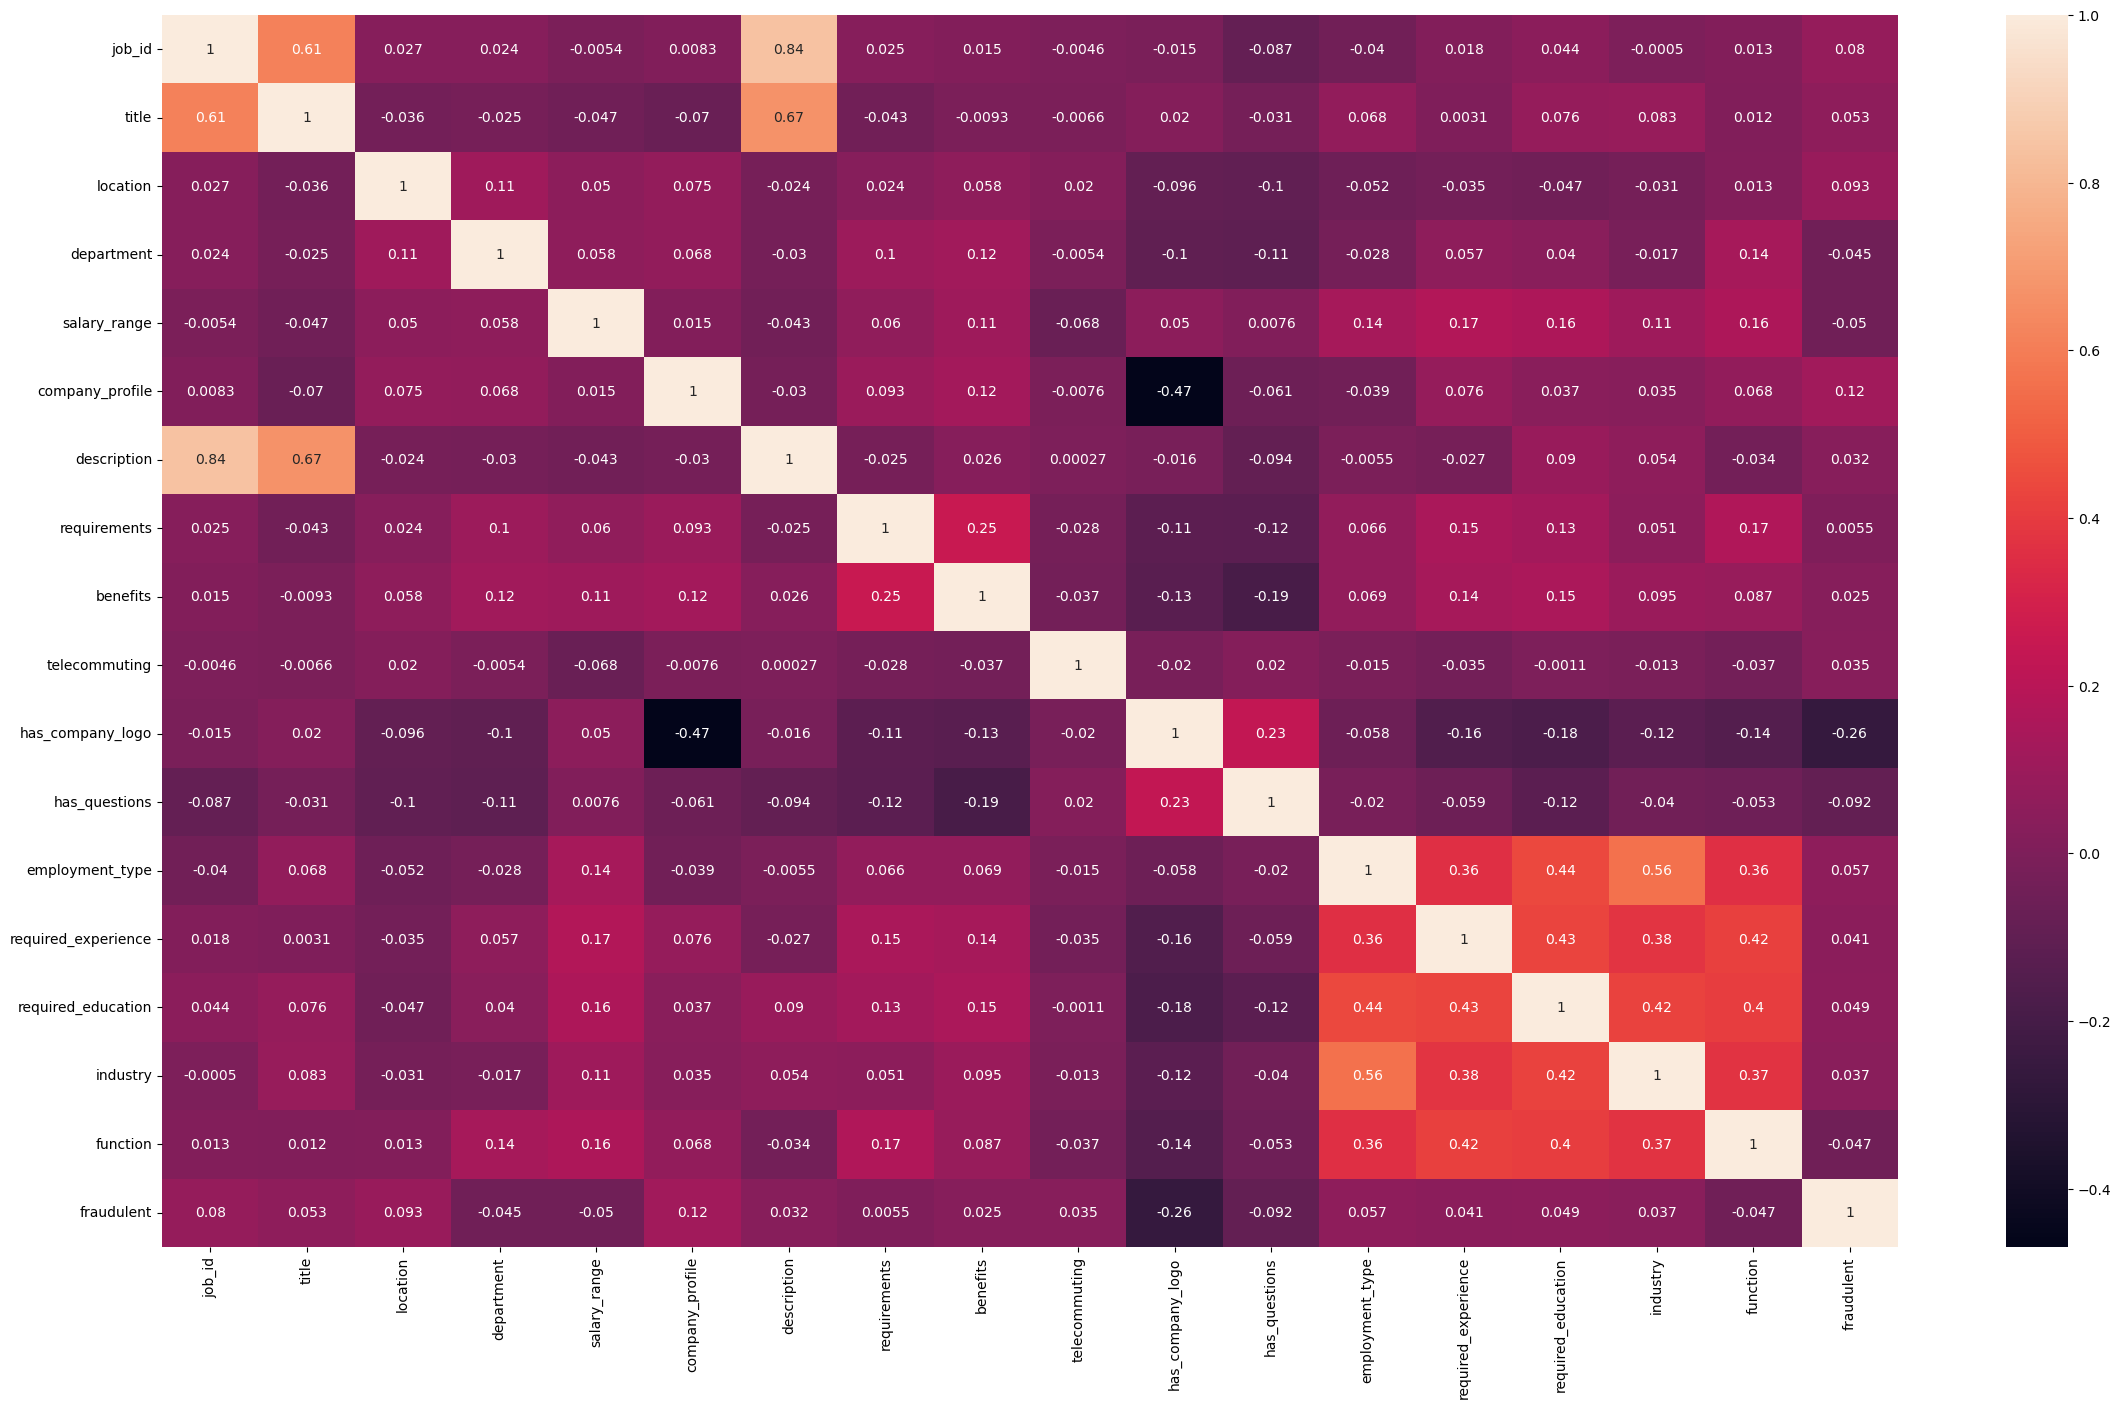

In [23]:
plt.figure(figsize=(28,16))
sns.heatmap(df.corr(),annot=True)
plt.savefig('corr_matrix.png')

In [24]:
# Skew of Univariate Distributions
# The skew result can show us a positive(right) or negative (left) skew. Values closer to zero show less skew
try:
    print(df.skew())
    # It is better to use some data visualization to get a better idea.
    from matplotlib import pyplot as plt
    #df.hist(bins=10, figsize=(20, 15))
    plt.savefig('Univariate_Distributions.png')
    # plt.show()
except Exception as e:
    print("errorUnivariate")
    print(str(e))

job_id                 0.000000
title                  0.420581
location               0.011402
department            -1.411262
salary_range          -2.950436
company_profile       -0.440301
description            0.101635
requirements          -0.234908
benefits              -0.701804
telecommuting          4.512188
has_company_logo      -1.463895
has_questions          0.033117
employment_type        1.161948
required_experience   -0.679580
required_education    -0.165933
industry               0.148480
function              -0.314260
fraudulent             4.207199
dtype: float64


<Figure size 640x480 with 0 Axes>

In [25]:
#df.plot(kind='box', subplots=True,grid=True, layout=(5, 4), sharex=False, sharey=False, fontsize=8, figsize=(15, 20))
try:
    plt.savefig('boxplot.png')
    plt.show()
except Exception as e:
    print("errorUnivariate")
    print(str(e))
# Scatter Plot Matrix
# scatter_matrix(df,figsize=(20,20))
# plt.show()

<Figure size 640x480 with 0 Axes>

In [26]:
# Evaluation for Missing Data
try:
    missing_data = df.isnull()
    missing_data.head(5)
    print(missing_data.sum())
    for column in missing_data.columns.values.tolist():
        print(column)
        print(missing_data[column].value_counts())
        print("--------------------------------")
    # Finding the porcentage of  missing data
    print(round(((missing_data.sum() / len(missing_data)) * 100), 4))
    # Lets see our outliers in the data set

    q = df.quantile(0.99)
    print(df[df > q])
    # housing.dropna(subset=["total_bedrooms"]) # option 1

    # housing.drop("total_bedrooms", axis=1) # option 2

    # median = housing["total_bedrooms"].median()

    # housing["total_bedrooms"].fillna(median) # option 3

    # Lets check the types
    print(df.dtypes)
except Exception as e:
    print("error_Missing Data")
    print(str(e))

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64
job_id
False    17880
Name: job_id, dtype: int64
--------------------------------
title
False    17880
Name: title, dtype: int64
--------------------------------
location
False    17880
Name: location, dtype: int64
--------------------------------
department
False    17880
Name: department, dtype: int64
--------------------------------
salary_range
False    17880
Name: salary_range, dtype: int64
--------------------------------
company_profile
False    17880
Name: company_profile, dtype: int64
--------------------------------
descr

In [27]:
# df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
# Feature Selection For Machine Learning
try:
    X = df.drop(targetVariable, axis=1)
    y = df[targetVariable]

    lab_enc = preprocessing.LabelEncoder()
    training_scores_encoded = lab_enc.fit_transform(y)
    print(utils.multiclass.type_of_target(y))
    print(utils.multiclass.type_of_target(training_scores_encoded.astype('int')))
    print(utils.multiclass.type_of_target(training_scores_encoded))
    print(training_scores_encoded)
    # 1-Univariete Selection

    # apply SelectKBest class to extract top 10 best features
    bestfeatures = SelectKBest(score_func=chi2, k='all')
    fit = bestfeatures.fit(X, training_scores_encoded)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    # concat two dataframes for better visualization
    featureScores = pd.concat([dfcolumns, dfscores], axis=1)
    featureScores.columns = ['Specs', 'Score']  # naming the dataframe columns
    print(featureScores.nlargest(10, 'Score'))  # print 10 best features
except Exception as e:
    print("error Feature Selection")
    print(str(e))

binary
binary
binary
[0 0 0 ... 0 0 0]
              Specs          Score
0            job_id  339900.504083
1             title  140210.670310
2          location   80201.177457
5   company_profile   65916.739906
6       description   55098.088234
8          benefits   10345.676691
3        department    4497.168565
4      salary_range    1815.792327
7      requirements    1087.743686
15         industry     621.884631


In [28]:
# -Feature Importance

try:
    model = ExtraTreesClassifier()
    model.fit(X, training_scores_encoded)
    print(model.feature_importances_)  # use inbuilt class feature_importances of tree based classifiers
    # plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    #feat_importances.nlargest(10).plot(kind='barh')
    #plt.savefig('important_features.png', bbox_inches='tight')
except Exception as e:
    print("error Feature Importance")
    print(str(e))

[0.13150316 0.07752876 0.07782985 0.05007669 0.03116784 0.07442919
 0.09264332 0.05516414 0.05400603 0.01093019 0.07232309 0.02273619
 0.03890051 0.03869629 0.04036964 0.06621227 0.06548283]


    # Select the atribites and save the data frame that is ready for use with the machine learning model.

    # Model, predict and solve Now we are ready to train a model and predict the required solution. There are 60+
    # predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement
    # to narrow down to a select few models which we can evaluate. We are also perfoming a category of machine
    # learning which is called supervised learning as we are training our model with a given dataset. With these two
    # criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a
    # few. These include:

    # Logistic Regression
    # KNN or k-Nearest Neighbors
    # Support Vector Machines
    # Naive Bayes classifier
    # Decision Tree
    # Random Forrest
    # Perceptron
    # Artificial neural network
    # RVM or Relevance Vector Machine
    # LinearDiscriminantAnalysis
    # AdaBoostClassifier
    # GradientBoostingClassifier ExtraTreesClassifier

    # Load the test,train data.

In [29]:
CLASSIFIERS = ["LinR", "LogR", "KNN", "GNB", "Per", "LinSVC", "SGD", "DT", "RF", "LDA", "Ada_Ensemble", "GradBoost_Ensemble", "ETC", "XGB"]

In [ ]:
def classifiers(info):
    classifier_names = info[0]
    X = info[1]
    training_scores_encoded = info[2]
    df = info[3]
    targetVariable = info[4]
    for classifier_name in classifier_names:
        print("Working on " + classifier_name + "...")
        
        if (classifier_name == "LinR"):
            try:
                #print(df.columns)
#                 X = df.drop([targetVariable], axis=1).values
#                 y = df[targetVariable].values
                # from sklearn import preprocessing
                # X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))

                scaler = MinMaxScaler(feature_range=(0, 1))
                rescaledX = scaler.fit_transform(X)
                # X_test= preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
                # X_train.shape, y_train.shape, X_test.shape
                # Linear Regression
                kfold = KFold(n_splits=10, shuffle=True)
                lin_reg = LinearRegression()
                results_linreg = cross_val_score(lin_reg, X, training_scores_encoded, cv=kfold)
                print('Estimate accuracy Regression: ', results_linreg.mean())
            except Exception as e:
                print("Linear Regression")
                print(str(e))

        if (classifier_name == "LogR"):
            try:
#                 X = df.drop([targetVariable], axis=1).values
#                 y = df[targetVariable].values
#                 scaler = MinMaxScaler(feature_range=(0, 1))
#                 rescaledX = scaler.fit_transform(X)
                # Logistic Regression
                kfold = KFold(n_splits=10, random_state=10, shuffle=True)
                logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
                results_logreg = cross_val_score(logreg, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy Logistic regression: ', results_logreg.mean())
            except Exception as e:
                print("error Logistic regression")
                print(str(e))

        if (classifier_name == "KNN"):
            try:
                # Support Vector Machines

                kfold = KFold(n_splits=10)
                
                svc = SVC(C=0.01, cache_size=50, class_weight=None, coef0=0.0,
                          decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
                          max_iter=-1, probability=False, random_state=None, shrinking=True,
                          tol=0.001, verbose=False)
                
                results_svc = cross_val_score(svc, X, training_scores_encoded, cv=kfold, scoring='accuracy')
                print('Estimate accuracy SVC: ', results_svc.mean())
                # Estimate accuracy 0.7643198906356801
                
                kfold = KFold(n_splits=10, shuffle=True)
                knn = KNeighborsClassifier(n_neighbors=3)
                results_knn = cross_val_score(knn, X, training_scores_encoded, cv=kfold)
                print('Estimate accuracy SVM: ', results_knn.mean())
            except Exception as e:
                print("error SVM")
                print(str(e))

if sys.platform == "win32":  # Windows
    print("Classifier accuracy being obtained with single thread")
    classifiers([CLASSIFIERS, X, training_scores_encoded, df, targetVariable])

else:
    print("Classifier accuracy being obtained with multiple threads")
    fourDataSets = [[CLASSIFIERS[0:3], X, training_scores_encoded, df, targetVariable],
                    [CLASSIFIERS[4:7], X, training_scores_encoded, df, targetVariable],
                    [CLASSIFIERS[8:11], X, training_scores_encoded, df, targetVariable],
                    [CLASSIFIERS[12:13], X, training_scores_encoded, df, targetVariable]]

    pool = Pool(processes=4)
    pool.map(classifiers, fourDataSets)

# classifiers("nothing", X, training_scores_encoded, df)

Classifier accuracy being obtained with single thread
Working on LinR...
Estimate accuracy Regression:  0.1073132221667958
Working on LogR...
Estimate accuracy Logistic regression:  0.9522371364653244
Working on KNN...


In [ ]:
# if __name__ == '__main__':
#     main()

In [ ]:
try:
    # Model evaluation
    print("Model evaluation")
    models = pd.DataFrame({
        'Model': ['Linear Regression', 'Support Vector Machines', 'KNN', 'Logistic Regression',
                  'Random Forest', 'Naive Bayes', 'Perceptron',
                  'Stochastic Gradient Decent', 'Linear SVC',
                  'Decision Tree', 'Linear Discriminant Analysis', 'Ada Boost Classifier',
                  'Gradient Boosting Classifier', 'Extra TreesClassifier', 'XGB Classifier'],
        'Score': [results_linreg.mean(), results_logreg.mean(), results_svc.mean(), results_knn.mean(),
                  results_gaussian.mean(), results_perceptron.mean(), results_linearsvc.mean(),
                  results_sgd.mean(), results_decisiontree.mean(), results_randomforest.mean(),
                  results_clf.mean(), results_AB.mean(), results_GBC.mean(), results_ETC.mean(),
                  results_xgbs.mean()]})
    print(models.sort_values(by='Score', ascending=False))
	
# Model	Score
except Exception as e:
    print("error Model evaluation, you may be using multiple threads")
    print(str(e))